** 회귀모형 5 **
- 회귀모형1을 다시 생성하여 회귀모수의 pvalue를 확인한다. 이후, pvalue>0.05 인 데이터를 제거한다.
- 카테고리: Fuel_Type, Color (엑셀 단에서의 one hot encoding)
- train 데이터 모두 사용

**제거된 변수**

In [14]:
# 회귀모형 1에서 제외된 변수
to_del_var_1 = ['Met_Color', 'CC', 'Gears', 'ABS', 'Airbag_1', 'Airbag_2',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Power_Steering', 'Radio',
       'Mistlamps', 'Backseat_Divider', 'Radio_cassette', 'Parking_Assistant',
       'col_dummy1', 'col_dummy2', 'col_dummy4', 'col_dummy6', 'col_dummy7',
       'col_dummy8', 'col_dummy9', 'col_dummy10', 'fuel_dumm2']

In [27]:
# 회귀모형 3에서 제외된 변수
to_del_var_3 = ['Airco', 'fuel_dumm3']

** 제외해야 할 변수를 확인하기 위해, model 1을 다시 생성 **

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
train_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/train.csv')
test_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/test.csv')

In [58]:
del train_df['Id']
del train_df['Color']
del train_df['Model']
del train_df['Fuel_Type']
del train_df['Fuel_Type.1']
del train_df['Cylinders']

In [59]:
y_train_df = train_df['Price']
del train_df['Price']
x_train_df = sm.add_constant(train_df, has_constant='add')

In [60]:
x_train_df.head()

,const,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,col_dummy4,col_dummy5,col_dummy6,col_dummy7,col_dummy8,col_dummy9,col_dummy10,fuel_dumm1,fuel_dumm2,fuel_dumm3
0,1.0,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
1,1.0,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
2,1.0,30,3,2002,38500,90,0,0,2000,3,...,0,0,0,0,0,0,0,0,1,0
3,1.0,25,8,2002,31461,192,0,0,1800,3,...,0,0,0,0,0,0,0,0,0,1
4,1.0,25,8,2002,32189,192,0,0,1800,3,...,1,0,0,0,0,0,0,0,0,1


In [61]:
y_train_df.head()

0    13500
1    13750
2    13750
3    20950
4    19600
Name: Price, dtype: int64

In [62]:
model_corolla = sm.OLS(y_train_df, x_train_df)
result_corolla = model_corolla.fit()

** 회귀모형 1의 결과 **

In [63]:
# pvalue 0.05 초과인 독립변수
to_del_var = result_corolla.pvalues[result_corolla.pvalues > 0.05]
to_del_var.index

Index(['Met_Color', 'CC', 'Gears', 'ABS', 'Airbag_1', 'Airbag_2',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Power_Steering', 'Radio',
       'Mistlamps', 'Backseat_Divider', 'Radio_cassette', 'Parking_Assistant',
       'col_dummy1', 'col_dummy2', 'col_dummy4', 'col_dummy6', 'col_dummy7',
       'col_dummy8', 'col_dummy9', 'col_dummy10', 'fuel_dumm2'],
      dtype='object')

In [64]:
# 모형1에서 사용했던 train 데이터 복사
x_train_df_2 = x_train_df

In [65]:
# 모형2: 복사한 train 데이터에서 pvalue가 낮은 독립변수 제외 
for i in to_del_var.index:
    del x_train_df_2[i]

In [66]:
x_train_df_2.head() #집합: 오그멘테이션 o, 변수 제외 o

,const,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Automatic,Doors,Quarterly_Tax,Weight,...,Airco,Automatic_airco,Powered_Windows,Sport_Model,Metallic_Rim,Tow_Bar,col_dummy3,col_dummy5,fuel_dumm1,fuel_dumm3
0,1.0,23,10,2002,46986,90,0,3,210,1165,...,0,0,1,0,0,0,0,0,0,0
1,1.0,23,10,2002,72937,90,0,3,210,1165,...,1,0,0,0,0,0,0,0,0,0
2,1.0,30,3,2002,38500,90,0,3,210,1170,...,1,0,1,0,0,0,1,0,0,0
3,1.0,25,8,2002,31461,192,0,3,100,1185,...,1,1,1,0,1,0,0,0,0,1
4,1.0,25,8,2002,32189,192,0,3,100,1185,...,1,1,1,1,1,0,0,0,0,1


** 회귀모형 3 결과** 

In [67]:
model_corolla = sm.OLS(y_train_df, x_train_df_2)
result_corolla = model_corolla.fit()

In [68]:
print(result_corolla.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     455.4
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:52:05   Log-Likelihood:                -8591.4
No. Observations:                1019   AIC:                         1.723e+04
Df Residuals:                     997   BIC:                         1.734e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0079      0.001  

** 회귀모형 5 생성 및 결과 **

In [69]:
to_del_var_3 = result_corolla.pvalues[result_corolla.pvalues > 0.05].index

In [86]:
to_del_var_3

Index(['Airco', 'fuel_dumm3'], dtype='object')

In [70]:
for i in to_del_var_3:
    del x_train_df_2[i]

In [73]:
x_train_df_2.head()

,const,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Automatic,Doors,Quarterly_Tax,Weight,...,BOVAG_Guarantee,Guarantee_Period,Automatic_airco,Powered_Windows,Sport_Model,Metallic_Rim,Tow_Bar,col_dummy3,col_dummy5,fuel_dumm1
0,1.0,23,10,2002,46986,90,0,3,210,1165,...,1,3,0,1,0,0,0,0,0,0
1,1.0,23,10,2002,72937,90,0,3,210,1165,...,1,3,0,0,0,0,0,0,0,0
2,1.0,30,3,2002,38500,90,0,3,210,1170,...,1,3,0,1,0,0,0,1,0,0
3,1.0,25,8,2002,31461,192,0,3,100,1185,...,1,12,1,1,0,1,0,0,0,0
4,1.0,25,8,2002,32189,192,0,3,100,1185,...,1,3,1,1,1,1,0,0,0,0


In [78]:
model_5 = sm.OLS(y_train_df, x_train_df_2)
result_5 = model_5.fit()

In [83]:
print(result_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     502.5
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        18:54:37   Log-Likelihood:                -8593.1
No. Observations:                1019   AIC:                         1.723e+04
Df Residuals:                     999   BIC:                         1.732e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0078      0.000  

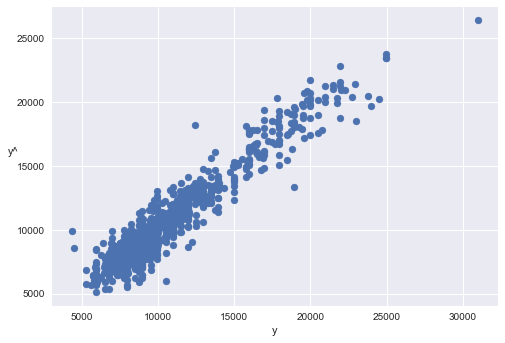

In [80]:
y_train_new = result_5.predict(x_train_df_2)

plt.scatter(y_train_df, y_train_new)
plt.xlabel(u"y")
plt.ylabel(u"y^",rotation=1)
plt.show()

In [81]:
sm.tools.eval_measures.rmse(y_train_df, y_train_new)

1112.0468165042089